In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #Evaluates the quality of clusters in your data.
from mpl_toolkits.mplot3d import Axes3D  #Creating 3D visualizations to better understand the relationships between different features in your dataset.
import warnings
warnings.filterwarnings("ignore")

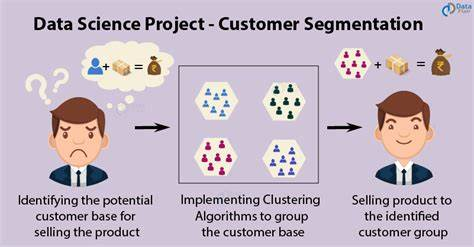

In [2]:
from IPython.display import Image,display,HTML
display(HTML("<h2> Mall Customer Segmentation </h2>"))
display(Image("Mall Customer Segmentation.jpg", width=500, height=300, retina=False))

#### Basic Info of the Dataset

In [3]:
df = pd.read_csv("Shopping Mall Customer Segmentation Data .csv")
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [4]:
df.shape 

(15079, 5)

In [5]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.1+ KB


In [7]:
# Checking for NUll values in the dataset
df.isna().sum()

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

**There are no null values in this dataset**

In [8]:
df.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


**Statistical Operations On Dataset**

In [9]:
#Descriptive Statistics
mean_score = df['Spending Score'].mean()
median_score = df['Spending Score'].median()
std_score = df['Spending Score'].std()
var_score = df['Spending Score'].var()

In [10]:
mean_score , median_score

(np.float64(50.59161748126534), 51.0)

In [11]:
std_score , var_score

(28.7269774719922, 825.2392346763473)

**Data Preprocessing**

In [12]:
#Counting how many males and females
df['Gender'].value_counts()

Gender
Male      7595
Female    7484
Name: count, dtype: int64

In [13]:
#For Array Operations
age_array = df['Age'].values
income_array = df['Annual Income'].values
spending_array = df['Spending Score'].values
age_income_sum = np.add(age_array, income_array)

In [14]:
age_array[:10]

array([30, 58, 62, 23, 24, 42, 27, 24, 83, 62])

In [15]:
age_income_sum[:10]

array([151509, 185146,  70974,  55483, 153776, 158377, 163528,  70500,
        47826,  63510])

In [16]:
high_spenders = df[df['Spending Score'] > 80]
high_spenders.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
13,caa4ad5a-51b2-4af1-91cb-e2802f620239,32,Female,159892,96
14,0c9d0e0d-a601-488c-9f3f-f036f2bdb536,51,Female,135079,87
15,dc35a079-c3db-44f4-8612-d0af9daea414,64,Female,32869,81


In [17]:
sample_df = df.sample(n=10)
sample_df

,Customer ID,Age,Gender,Annual Income,Spending Score
14273,0cf8361e-5d87-4c80-9025-fc1ee8d6e122,88,Male,115244,44
11790,671dc5d7-0137-4d5c-a4e4-4db7912f144b,42,Male,57268,32
7398,ee75a078-4e43-4d1d-bada-ded2dc931fdd,52,Male,142603,7
11715,350c591b-2de2-4b3c-adfd-d3d1d8b07bd1,57,Female,106820,57
2062,3b4c5fa6-7d39-48be-a786-87a7fe402dd2,72,Female,40145,56
6659,5890b93c-e17a-4844-8c36-062d508ee764,61,Female,67124,21
1939,0ec36cae-baef-43c2-b2c2-cb59ee09ae57,76,Female,120275,21
12434,2b0b05c4-253c-4be8-862d-b44d90d240b1,55,Male,27862,47
7237,1882ba8f-0aed-4a19-bec7-61ecd34048fe,41,Male,190929,8
2904,e3bf3503-f825-4e51-96c9-ed6e29788e06,61,Male,105266,88


#### Feature Scaling

In [18]:
# Select features for clustering
features = ['Age', 'Annual Income', 'Spending Score']
X = df[features]
# Scaling the features for Optimal Cluster Analysis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Converting Categorical Into Numerical 

- It's generally a good practice to convert categorical columns into numerical values before data visualization, especially when you're working with machine learning models. This ensures that all features are in a consistent format and can be easily interpreted by the visualization tools.

In [19]:
# Encode categorical features
categorical_list = [X_scaled for X_scaled in df.columns if df[X_scaled].dtype =='object']
categorical_list

['Customer ID', 'Gender']

In [20]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [21]:
df['Gender'].head()

0    0
1    1
2    1
3    0
4    0
Name: Gender, dtype: int64

In [22]:
df["Gender"].dtype

dtype('int64')

### Data Visualization

**Histograms**

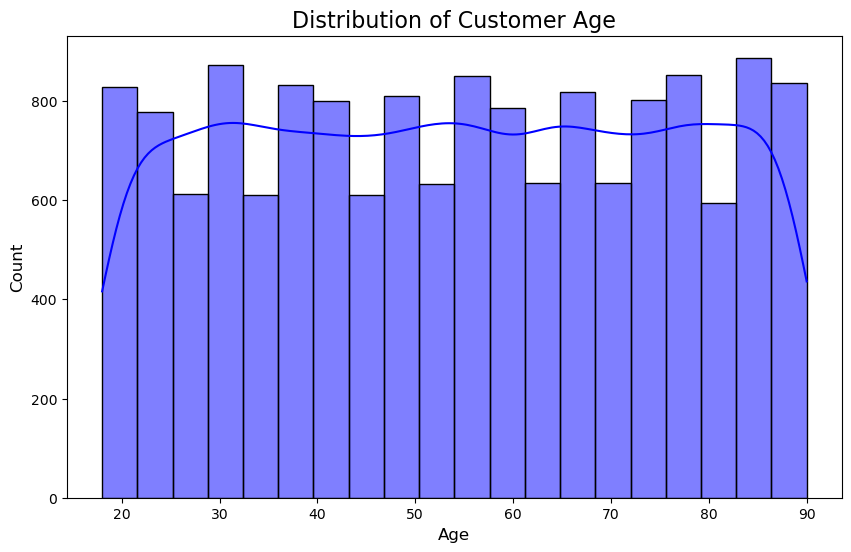

In [23]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Customer Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show();

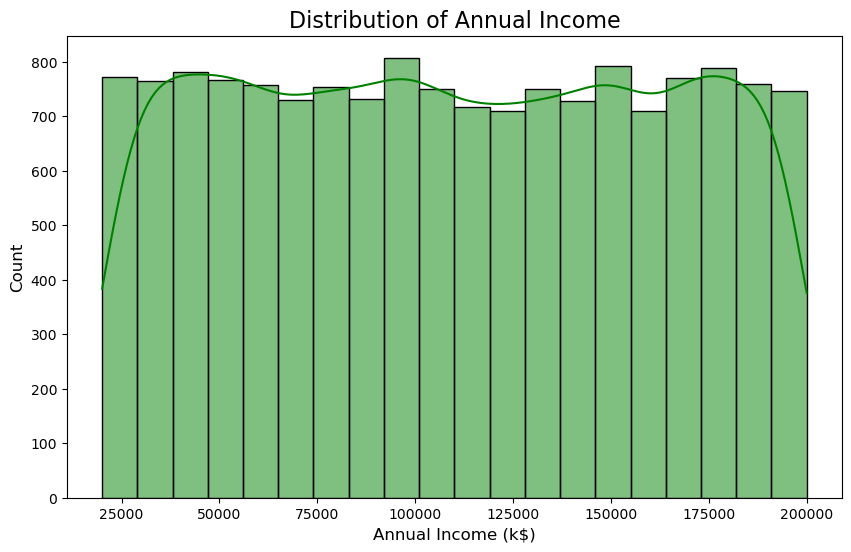

In [24]:
# Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income'], bins=20, kde=True, color='green')
plt.title('Distribution of Annual Income', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show();

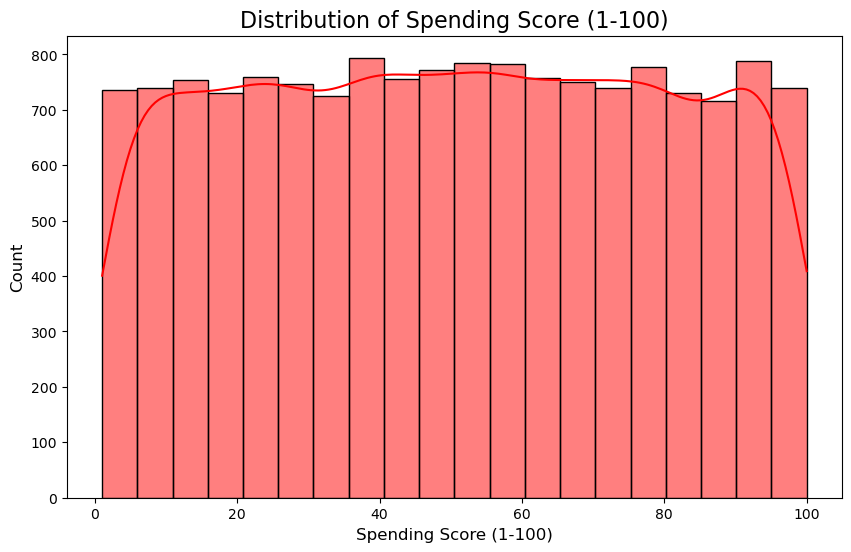

In [25]:
# Distribution of Spending Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score'], bins=20, kde=True, color='red')
plt.title('Distribution of Spending Score (1-100)', fontsize=16)
plt.xlabel('Spending Score (1-100)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show();

**Pair-Plots**

<Figure size 1200x800 with 0 Axes>

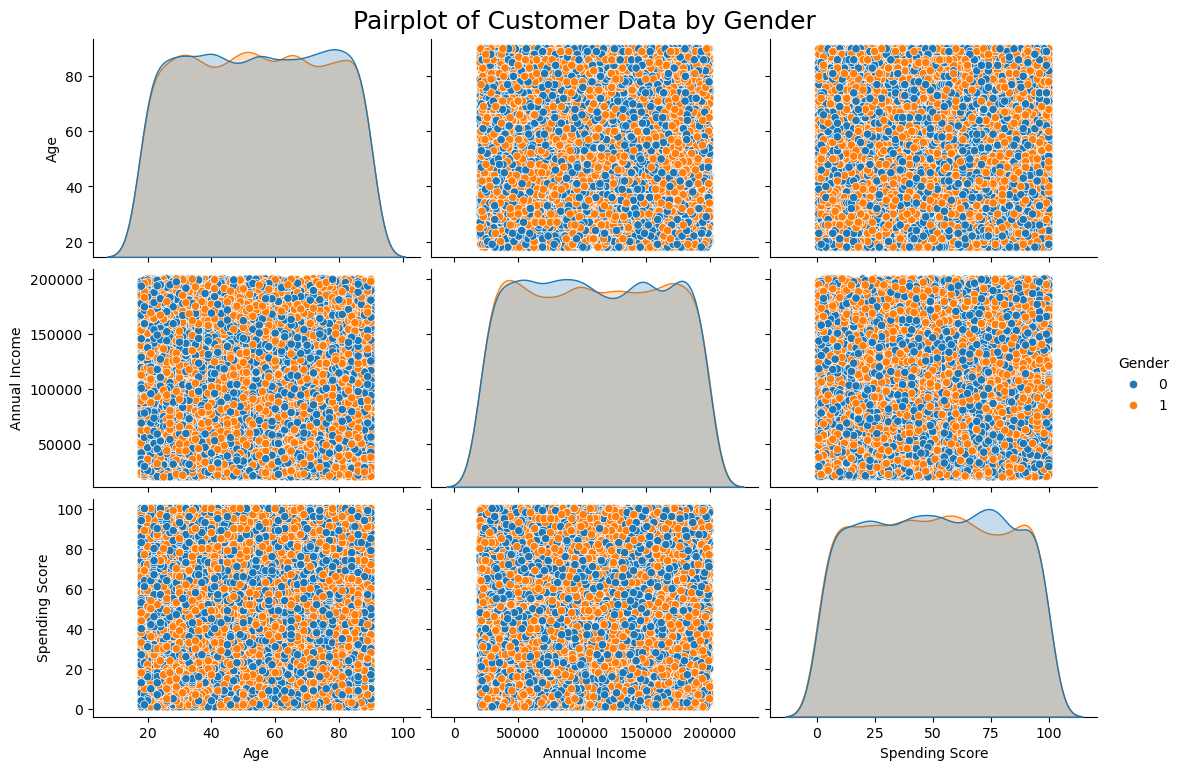

In [26]:
plt.figure(figsize=(12, 8))
sns.pairplot(df.drop('Customer ID', axis=1), hue='Gender', aspect=1.5)
plt.suptitle('Pairplot of Customer Data by Gender', y=1.02, fontsize=18)
plt.show();


### K-Means Clustering Analysis

In [27]:
# For clustering, we will use the 'Annual Income' and 'Spending Score' columns, We select these two columns to create our feature set 'X'.
X_scaled = df.loc[:, ['Annual Income', 'Spending Score']].values

**Finding the Optimal Number of Clusters using the Elbow Method**
- The Elbow Method helps us find the best value for 'K' (the number of clusters). We calculate the **Within-Cluster-Sum-of-Squares (WCSS)** for different values of K. WCSS is the sum of squared distance between each point and the centroid in a cluster.
- However, there is a point where increasing K no longer leads to a significant decrease in WCSS, and the rate of decrease slows down. This point is often referred to as the elbow.

In [28]:
print("\nCalculating WCSS for the Elbow Method...")
wcss = []
# We will test for k values from 1 to 10.
for i in range(1, 11):
    # Creating a KMeans instance for the given number of clusters.
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    
    kmeans.fit(X)
    # The 'inertia_' attribute gives us the WCSS value for the fitted model.
    wcss.append(kmeans.inertia_)


Calculating WCSS for the Elbow Method...


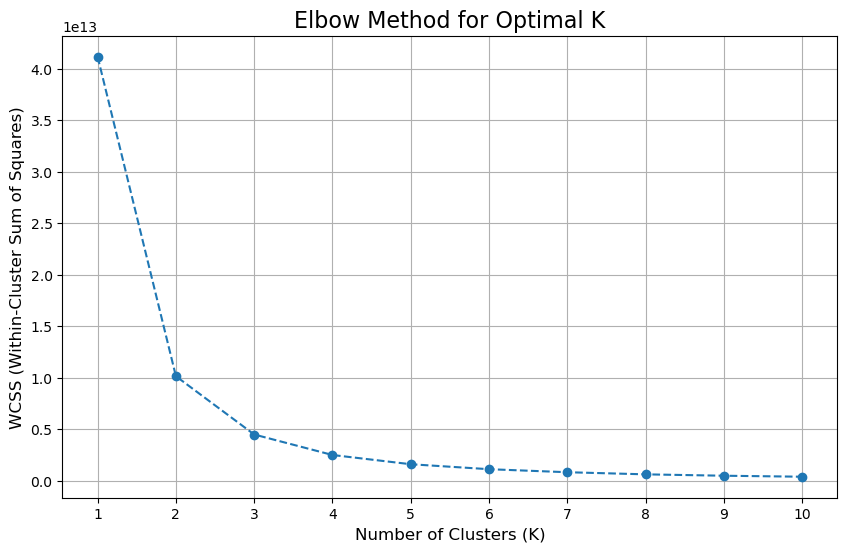


WCSS values for K from 1 to 10:
K = 1: WCSS = 41,162,996,913,762.52
K = 2: WCSS = 10,155,905,664,587.51
K = 3: WCSS = 4,499,408,755,371.93
K = 4: WCSS = 2,510,700,911,110.34
K = 5: WCSS = 1,614,278,357,838.01
K = 6: WCSS = 1,132,374,002,562.27
K = 7: WCSS = 839,470,854,854.80
K = 8: WCSS = 632,783,520,187.27
K = 9: WCSS = 499,069,097,006.57
K = 10: WCSS = 402,433,277,719.11


In [29]:
# Plotting the WCSS scores to find the Elbow 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(range(1, 11)) # Ensure x-axis ticks are integers for each K value
plt.grid(True)
plt.show();

print("\nWCSS values for K from 1 to 10:")
for k, score in enumerate(wcss, 1):
    print(f"K = {k}: WCSS = {score:,.2f}")

In [30]:
print("The optimal number of clusters is 3.")

The optimal number of clusters is 3.


#### Model Training & Evaluation
- **Applying K-Means with the Optimal Number of Clusters (K=3). Now we train the model with our chosen K.**

In [31]:
print("\nTraining the K-Means model with K=3")
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)


Training the K-Means model with K=3


In [32]:
y_kmeans = kmeans.fit_predict(X)

In [33]:
#Evaluating Metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette:.2f}")

# Calinski-Harabasz Score
calinski = calinski_harabasz_score(X, y_kmeans)
print(f"Calinski-Harabasz Score: {calinski:.2f}")

# Davies-Bouldin Score
davies = davies_bouldin_score(X, y_kmeans)
print(f"Davies-Bouldin Score: {davies:.2f}")

Silhouette Score: 0.59
Calinski-Harabasz Score: 61423.67
Davies-Bouldin Score: 0.50


- Silhouette Score : Score is between -1 and 1. Higher is better. It measures how similar a data point is to its own cluster compared to others.
- Calinski Harabasz Score : Higher is better. It's the ratio of between-cluster variance to within-cluster variance.
- Davies Bouldin Score : Lower is better, with 0 being the best. It measures the average similarity between clusters.

In [34]:
# Let's see the cluster labels for the first few customers
print("Cluster labels for the first 10 customers:", y_kmeans[:10])

Cluster labels for the first 10 customers: [2 2 1 1 2 2 2 1 1 1]


#### Data Visualization Using Plotly

In [35]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

inertias = []
silhouette_scores = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

In [36]:
# Creating subplots using plotly
fig = make_subplots(rows=1, cols=2, 
                   subplot_titles=('Elbow Method', 'Silhouette Method'))

# Add Elbow curve
fig.add_trace(
    go.Scatter(x=list(K[1:]), y=inertias, mode='lines+markers',
              name='Inertia', line=dict(color='blue')),
    row=1, col=1
)

# Add Silhouette curve
fig.add_trace(
    go.Scatter(x=list(K[2:]), y=silhouette_scores, mode='lines+markers',
              name='Silhouette Score', line=dict(color='red')),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text="Optimal Cluster Analysis",
    showlegend=True,
    height=500,
    width=1000
)

# Update axes labels
fig.update_xaxes(title_text="Number of Clusters (k)", row=1, col=1)
fig.update_xaxes(title_text="Number of Clusters (k)", row=1, col=2)
fig.update_yaxes(title_text="Inertia", row=1, col=1)
fig.update_yaxes(title_text="Silhouette Score", row=1, col=2)

fig.show();

**2D Visualization**

In [38]:
# Set optimal k based on analysis
optimal_k = 6

# Train K-means
kmeans = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [39]:
fig_2d = px.scatter(
    df,
    x='Annual Income',
    y='Spending Score',
    color='Cluster',
    title='Customer Segments - 2D View',
    labels={
        'Annual Income': 'Annual Income',
        'Spending Score': 'Spending Score'
    },
    color_continuous_scale='viridis'
)

fig_2d.update_layout(
    title={'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
    height=600,
    width=800
)
fig_2d.show();

**3D Visualization**

In [40]:
fig_3d = px.scatter_3d(
    df,
    x='Age',
    y='Annual Income',
    z='Spending Score',
    color='Cluster',
    title='Customer Segments - 3D View',
    labels={
        'Age': 'Age',
        'Annual Income': 'Annual Income',
        'Spending Score': 'Spending Score'
    },
    color_continuous_scale='viridis'
)

fig_3d.update_layout(
    scene = dict(
        xaxis_title='Age',
        yaxis_title='Annual Income',
        zaxis_title='Spending Score'
    ),
    title={'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
    height=700,
    width=900
)
fig_3d.show();


- We perform KMeans clustering to identify patterns and group similar data points together. This helps us understand the underlying structure of the data and make informed decisions. In this case, clustering customers based on age, Annual Income, and Spending Score can help businesses tailor their marketing strategies, improve customer segmentation, and enhance overall customer experience. By visualizing the cluster centers, we can easily see the characteristics of each group and target them more effectively.

#### Cluster Analysis

In [151]:
features = ['Age', 'Annual Income', 'Spending Score', 'Gender']
cluster_stats = []

# Define a consistent color sequence using Plotly's qualitative color sequences
colors = px.colors.qualitative.Set3[:optimal_k]

for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    stats = {
        'Cluster': f'Cluster {i}',
        'Size': len(cluster_data)
    }
    for feature in features:
        stats[f'{feature}_Mean'] = cluster_data[feature].mean()
        stats[f'{feature}_Std'] = cluster_data[feature].std()
    cluster_stats.append(stats)

# Create a DataFrame with cluster statistics
cluster_stats_df = pd.DataFrame(cluster_stats)

# Visualization of cluster characteristics
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Age Distribution', 'Income Distribution', 
                   'Spending Score Distribution', 'Gender Distribution')
)

for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    cluster_color = colors[i]  # Use consistent color for each cluster
    
    # Age distribution
    fig.add_trace(
        go.Box(y=cluster_data['Age'], 
              name=f'Cluster {i}',
              marker_color=cluster_color,
              line_color=cluster_color),
        row=1, col=1
    )
    
    # Income distribution
    fig.add_trace(
        go.Box(y=cluster_data['Annual Income'], 
              name=f'Cluster {i}',
              marker_color=cluster_color,
              line_color=cluster_color),
        row=1, col=2
    )
    
    # Spending Score distribution
    fig.add_trace(
        go.Box(y=cluster_data['Spending Score'], 
              name=f'Cluster {i}',
              marker_color=cluster_color,
              line_color=cluster_color),
        row=2, col=1
    )
    
    # Gender distribution
    gender_counts = cluster_data['Gender'].value_counts(normalize=True)
    fig.add_trace(
        go.Bar(x=[f'Cluster {i}'], 
              y=[gender_counts.get(1, 0)], 
              name=f'Cluster {i}',
              marker_color=cluster_color),
        row=2, col=2
    )

fig.update_layout(
    height=800,
    width=1200,
    showlegend=True,
    title_text="Cluster Characteristics",
    plot_bgcolor='white'  # Setting white background for better visibility
)

# Update layout for better visibility
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')

fig.show();

Using **tabulate** to print the DataFrame.
- headers="keys"' uses the DataFrame column names as headers.
- tablefmt="psql"' is a common format that looks like a database table.
- You can experiment with other formats like "grid", "fancy_grid", "simple", "html", "latex", etc.

**Classification Summary**

In [152]:
print("\nCluster Statistics:")

print(cluster_stats_df.round(2))


Cluster Statistics:
     Cluster  Size  Age_Mean  Age_Std  Annual Income_Mean  Annual Income_Std  \
0  Cluster 0  2545     54.25    20.86            66736.00            8914.63   
1  Cluster 1  2414     54.16    21.33           156538.38            8425.83   
2  Cluster 2  2563     54.24    21.13            97295.79            8674.11   
3  Cluster 3  2709     53.84    20.98            35833.85            9101.72   
4  Cluster 4  2466     54.14    21.33           185336.40            8336.91   
5  Cluster 5  2382     54.56    21.12           127457.42            8533.13   

   Spending Score_Mean  Spending Score_Std  Gender_Mean  Gender_Std  
0                50.55               28.73         0.52         0.5  
1                51.08               29.05         0.51         0.5  
2                50.77               28.79         0.51         0.5  
3                50.06               28.73         0.49         0.5  
4                50.37               28.58         0.50         0.5 

#### Loading Model

In [153]:
import joblib

# Step 1: Save the trained K-Means model
model_filename = 'kmeans_customer_segmentation_model.joblib'
joblib.dump(kmeans, model_filename)
print(f"K-Means Model saved as: {model_filename}")

# Step 2: Saving the StandardScaler ()
scaler_filename = 'scaler_clustering.joblib' # Using a distinct name to avoid conflict with regression scaler
joblib.dump(scaler, scaler_filename)
print(f"StandardScaler for clustering saved as: {scaler_filename}")

# Step 3: Saving the list of feature names used for clustering 
# This is crucial for ensuring the Flask app receives features in the correct order.
feature_names_for_clustering = X.columns.tolist()
features_list_filename = 'clustering_features.joblib'
joblib.dump(feature_names_for_clustering, features_list_filename)
print(f"Clustering feature names saved as: {features_list_filename}")

print("\nAll necessary assets for K-Means deployment saved successfully.")

K-Means Model saved as: kmeans_customer_segmentation_model.joblib
StandardScaler for clustering saved as: scaler_clustering.joblib
Clustering feature names saved as: clustering_features.joblib

All necessary assets for K-Means deployment saved successfully.


In [154]:
import joblib
import numpy as np

try:
    loaded_kmeans_model = joblib.load('kmeans_customer_segmentation_model.joblib')
    if hasattr(loaded_kmeans_model, 'n_features_in_'):
        print(f"Loaded K-Means model expects {loaded_kmeans_model.n_features_in_} features.")
    else:
        # Fallback for older scikit-learn versions or if attribute is missing
        print(f"Loaded K-Means model's cluster centers shape: {loaded_kmeans_model.cluster_centers_.shape}")
        print(f"This indicates the model expects {loaded_kmeans_model.cluster_centers_.shape[1]} features.")
except Exception as e:
    print(f"Error loading K-Means model: {e}")

Loaded K-Means model expects 3 features.


In [155]:
import joblib

try:
    loaded_clustering_features = joblib.load('clustering_features.joblib')
    print(f"\nContent of clustering_features.joblib: {loaded_clustering_features}")
    print(f"Number of features in clustering_features.joblib: {len(loaded_clustering_features)}")
except Exception as e:
    print(f"Error loading clustering_features.joblib: {e}")


Content of clustering_features.joblib: ['Age', 'Annual Income', 'Spending Score']
Number of features in clustering_features.joblib: 3


In [156]:
print(f"\nFeatures used to define X for training: {X.columns.tolist()}")


Features used to define X for training: ['Age', 'Annual Income', 'Spending Score']
